## travaux pratique de l'etudiant 
### objectif :
detecter le mieux possible les sentimenents dans les tweets

## importation des bibliotheques 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# collecte des donnees

In [88]:
columns = ['sentiments','ids','date','flag','user','text']
df = pd.read_csv("J://document//dataset.csv", encoding='ISO-8859-1', names=columns)

### À propos de Dataset
<li>Contexte : </li>
Il s’agit de l’ensemble de données sentiment140. Il contient 1 600 000 tweets extraits à l’aide de l’API Twitter. Les tweets ont été annotés (0 = négatif, 4 = positif) et ils peuvent être utilisés pour détecter les sentiments.

<li>Contenu</li>
Il contient les 6 champs suivants :

Cible : la polarité du tweet (0 = négatif, 2 = neutre, 4 = positif)

ids : L’identifiant du tweet ( 2087)

date : la date du tweet (samedi 16 mai 23:58:44 UTC 2009)

flag : La requête (lyx). S’il n’y a pas de requête, cette valeur est NO_QUERY.

utilisateur : l’utilisateur qui a tweeté (robotickilldozr)

text : le texte du tweet 

In [89]:
df.head()

,sentiments,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   sentiments  1600000 non-null  int64 
 1   ids         1600000 non-null  int64 
 2   date        1600000 non-null  object
 3   flag        1600000 non-null  object
 4   user        1600000 non-null  object
 5   text        1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


notre dataset possede 2 variables de types int et 4 de typess objet

In [91]:
df.isnull().sum()

sentiments    0
ids           0
date          0
flag          0
user          0
text          0
dtype: int64

## j'elimine les variables non pertinentes c'est a dire ce qui ne m'aiderons pas dans notre travail

In [94]:
df= df[['text','sentiments']]

In [95]:
df['sentiments'].value_counts()

sentiments
0    800000
4    800000
Name: count, dtype: int64

###  notre dataset est equilibree car le nombres d'occurences de chaques est  egale

## puisque nous ne disposons pas d'assez de ressources pour travaillez sur une dataset de cet ampleur nous selectionnons au hazard 5000 lignes de chaque classe

In [8]:
tweets_negatif = df[df['sentiments']==0].sample(n=5000,random_state=42)
tweets_positif = df[df['sentiments']==4].sample(n=5000,random_state=42)

In [9]:
df_reduit = pd.DataFrame(pd.concat([tweets_negatif,tweets_positif], axis=0))

In [10]:
df_reduit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 212188 to 1471359
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        10000 non-null  object
 1   sentiments  10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 234.4+ KB


In [11]:
df_reduit.head()

,text,sentiments
212188,@dickiemaxx Win a few; lose few a with a,0
299036,@lavjonas tokio hotel and won tokio hotel that...,0
475977,"Right, off to work Only 5 hours to go until I...",0
385829,@daibarnes and guess who's landed that plum jo...,0
138859,@rabbit_rabid can't sleep... come give me hug...,0


## visualisation 

In [70]:
df_reduit['sentiments'].replace(4,1,inplace=True)

<Axes: xlabel='sentiments', ylabel='count'>

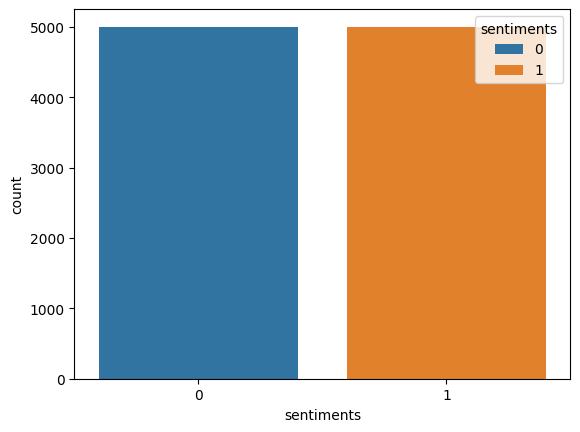

In [71]:
sns.countplot(x='sentiments', data =df_reduit, hue = 'sentiments')

### notre deuxime visualisation nous permettra de connaitre les mots les plus frequents sur notre dataset et ensuite sur nos differentes classes

In [16]:
from wordcloud import WordCloud

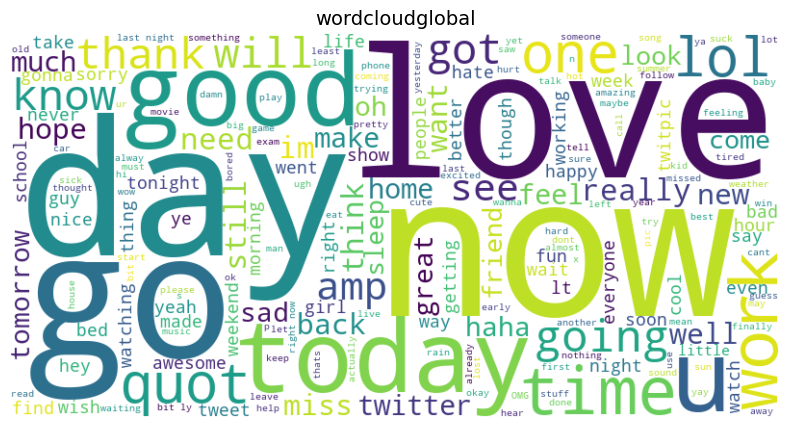

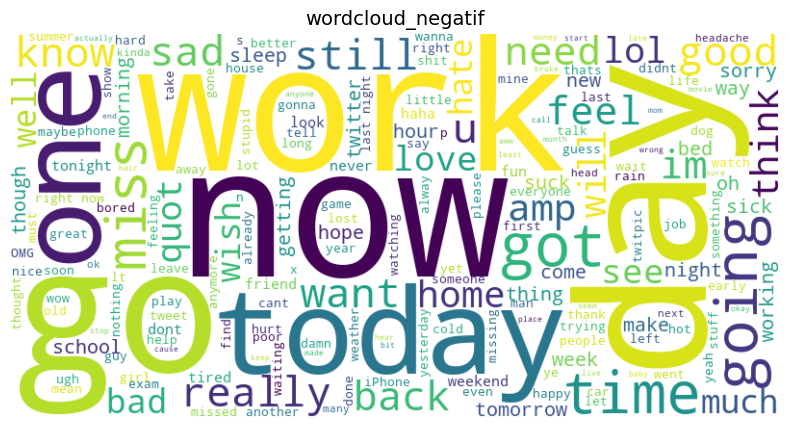

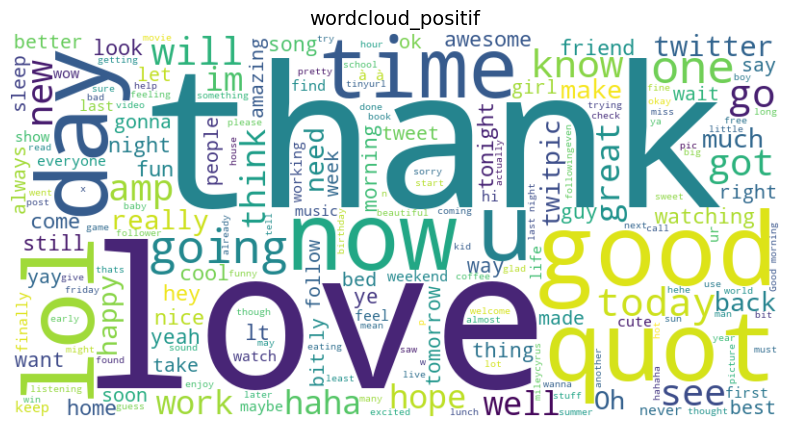

In [17]:
def genererWordcloud(tweets,titre) :
    texteBrute = ' '.join(tweets)
    wordcloud = WordCloud(width=800,height=400, background_color='white').generate(texteBrute)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.title(titre, fontsize=14)
    plt.axis('off')
    plt.show()
    
genererWordcloud(df_reduit['text'], 'wordcloudglobal')
genererWordcloud(tweets_negatif['text'], 'wordcloud_negatif')
genererWordcloud(tweets_positif['text'], 'wordcloud_positif')

# pretraitement 

In [18]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

## ici nous remplacons toutes les expressions qui ne sont ni des mots ni des espaces et ni des underscore par des chaines vide 

In [19]:
nltk.download('wordnet') # Une base de données sémantique de la langue anglaise.qui met en relation les mots (antonyme,synonyme)

nltk.download('stopwords') # Une liste de mots communs à ignorer lors du traitement de texte
nltk.download('punkt') # Un modèle pour le découpage des phrases

def cleanTExt (text) :
    text = re.sub(r"[^\w\s]","",text) # remplacer tout caractère qui n'est ni un mot, ni un espace par une chaîne vide.

    text = text.lower() #Convertit tout le texte en minuscules pour uniformiser le traitement

    tokens = word_tokenize(text) # Divise le texte en mots individuels (tokens) à l'aide de la fonction

    stop_words= set(stopwords.words('english'))     #Récupère la liste des mots vides en anglais et crée un ensemble (stop_words.
    
    tokens = [word for word in tokens if word not in stop_words]    #Filtre les tokens pour supprimer ceux qui sont dans la liste des mots vides

    clean_TExt = ' '.join(tokens)

    return clean_TExt

df_reduit['text_nettoyer'] = df_reduit['text'].apply(cleanTExt)
df_reduit

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


,text,sentiments,text_nettoyer
212188,@dickiemaxx Win a few; lose few a with a,0,dickiemaxx win lose
299036,@lavjonas tokio hotel and won tokio hotel that...,0,lavjonas tokio hotel tokio hotel thats bad
475977,"Right, off to work Only 5 hours to go until I...",0,right work 5 hours go im free xd
385829,@daibarnes and guess who's landed that plum jo...,0,daibarnes guess whos landed plum job moi hosti...
138859,@rabbit_rabid can't sleep... come give me hug...,0,rabbit_rabid cant sleep come give hug
...,...,...,...
916158,@krystynchong Love to see that!,1,krystynchong love see
1082424,Lovely day spent with the misses. Just loverly,1,lovely day spent misses loverly
1349284,@jason_mraz i love the fact that people are es...,1,jason_mraz love fact people essentially good m...
1317366,time to shower and tidy then going to go out f...,1,time shower tidy going go lunch friend lake si...


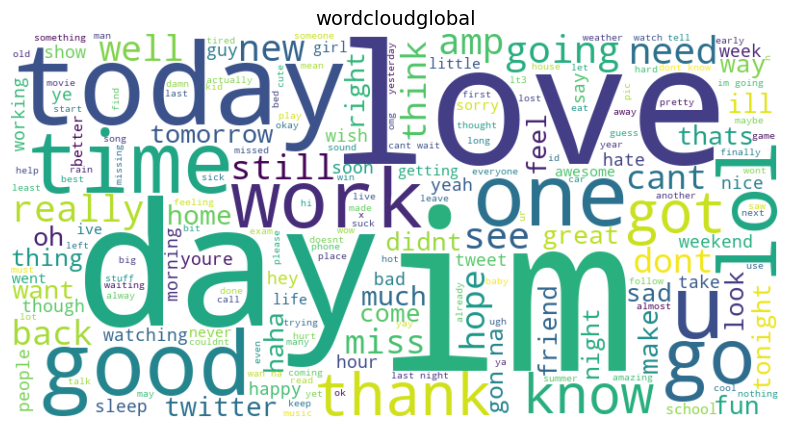

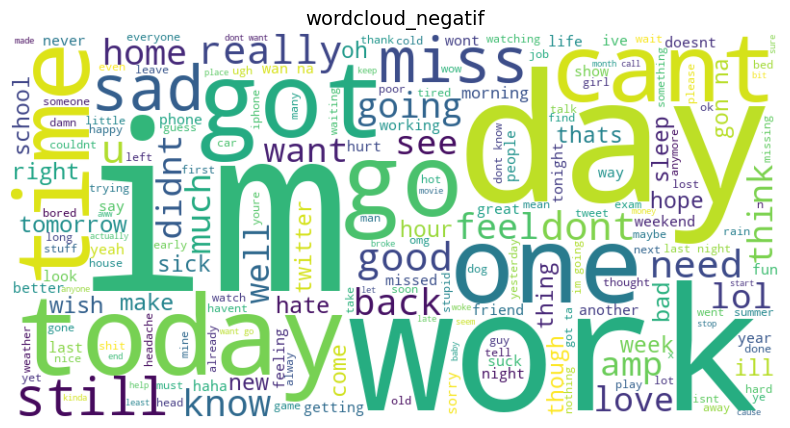

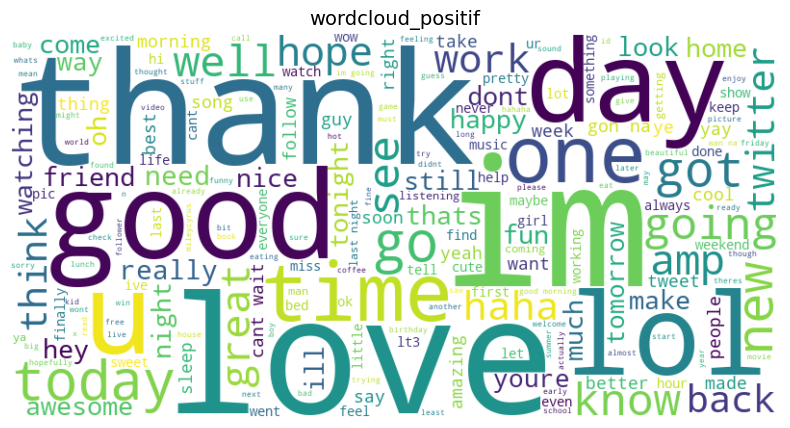

In [20]:
genererWordcloud(df_reduit['text_nettoyer'], 'wordcloudglobal')

tweets_negatif = df_reduit[df_reduit['sentiments']==0] ['text_nettoyer']
genererWordcloud(tweets_negatif, 'wordcloud_negatif')
tweets_positif = df_reduit[df_reduit['sentiments']==1] ['text_nettoyer']
genererWordcloud(tweets_positif, 'wordcloud_positif')

## encodage 

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [76]:
vectorizer = TfidfVectorizer()

feature = vectorizer.fit_transform(df_reduit['text_nettoyer'])

feature = feature.toarray()


feature

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
import joblib 
joblib.dump(vectorizer, "vectoriser.joblib")

['vectoriser.joblib']

#  modelesiation

In [72]:
from sklearn.metrics import f1_score, confusion_matrix,classification_report
from sklearn.model_selection import learning_curve,GridSearchCV

In [24]:
from sklearn.model_selection import train_test_split
X = feature
y = df_reduit['sentiments']

X_train,X_test,y_train,y_test = train_test_split (X,y, test_size = 0.3, stratify=y,random_state=0)

In [28]:
def evaluate(model):
    model.fit(X_train,y_train)
    ypred= model.predict(X_test)
    print(f"le score d'entrainement est de {model.score(X_train,y_train)}")
    print(confusion_matrix(y_test,ypred))
    print(classification_report(y_test,ypred))
    #N, train_score, val_score = learning_curve(model,X_train,y_train, cv=4, train_sizes=np.linspace(0.1,1,10), scoring='f1')
    #plt.figure(figsize=(12,8))
    #plt.plot(N,train_score.mean(axis=1), label="train score")
    #plt.plot(N,val_score.mean(axis=1), label="val score")
    #plt.legend()

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [30]:
log = LogisticRegression()
evaluate(log)

le score d'entrainement est de 0.8971428571428571
[[1066  434]
 [ 362 1138]]
              precision    recall  f1-score   support

           0       0.75      0.71      0.73      1500
           1       0.72      0.76      0.74      1500

    accuracy                           0.73      3000
   macro avg       0.74      0.73      0.73      3000
weighted avg       0.74      0.73      0.73      3000



In [31]:
import joblib 
joblib.dump(log, "model1.joblib")

['model1.joblib']

In [32]:
randomForest=RandomForestClassifier(random_state=0)
adaboos= AdaBoostClassifier(random_state=0)
KNN= KNeighborsClassifier()
deci= DecisionTreeClassifier()
gauss= GaussianNB()

In [33]:
list_of_models={'randomForest':randomForest,'adaboost':adaboos,'Kneigh':KNN,'des':deci,'gauss':gauss}

In [34]:
for name, models in list_of_models.items() :
    print(models)
    evaluate(models)

RandomForestClassifier(random_state=0)
le score d'entrainement est de 0.9995714285714286
[[1009  491]
 [ 339 1161]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71      1500
           1       0.70      0.77      0.74      1500

    accuracy                           0.72      3000
   macro avg       0.73      0.72      0.72      3000
weighted avg       0.73      0.72      0.72      3000

AdaBoostClassifier(random_state=0)


C:\Users\HIGH-TECH CORP'S\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


le score d'entrainement est de 0.6544285714285715
[[ 659  841]
 [ 188 1312]]
              precision    recall  f1-score   support

           0       0.78      0.44      0.56      1500
           1       0.61      0.87      0.72      1500

    accuracy                           0.66      3000
   macro avg       0.69      0.66      0.64      3000
weighted avg       0.69      0.66      0.64      3000

KNeighborsClassifier()
le score d'entrainement est de 0.8157142857142857
[[1066  434]
 [ 659  841]]
              precision    recall  f1-score   support

           0       0.62      0.71      0.66      1500
           1       0.66      0.56      0.61      1500

    accuracy                           0.64      3000
   macro avg       0.64      0.64      0.63      3000
weighted avg       0.64      0.64      0.63      3000

DecisionTreeClassifier()
le score d'entrainement est de 0.9995714285714286
[[1015  485]
 [ 600  900]]
              precision    recall  f1-score   support

           0

apres analyse nous constatons que le meilleur model est la regression logistique

### optimisation de la regression logistique

In [32]:
from sklearn.model_selection import GridSearchCV

In [34]:
param ={'penalty' : ['l1', 'l2', 'elasticnet', None],'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky'],'max_iter': np.arange(150),'multi_class' : ['auto', 'ovr', 'multinomial']}

In [35]:
Gridsmote = GridSearchCV(LogisticRegression(),param,cv=5)

In [ ]:
Gridsmote.fit(X_train,y_train)

## creation de modeles (suite) ANNs

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [47]:
from tensorflow.keras.callbacks import EarlyStopping

In [48]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [49]:
model = Sequential()
model.add(Dense(units=30,activation='relu')) # couche d'entree 
model.add(Dense(units=15,activation='relu')) # couche cachee
model.add(Dense(units=1,activation='sigmoid')) # couche de sorti
model.compile(loss='binary_crossentropy', optimizer='adam')

In [50]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop])

Epoch 1/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.6829 - val_loss: 0.5829
Epoch 2/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.4266 - val_loss: 0.5332
Epoch 3/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1847 - val_loss: 0.6160
Epoch 4/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0775 - val_loss: 0.7044
Epoch 5/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0356 - val_loss: 0.7962
Epoch 6/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0241 - val_loss: 0.8745
Epoch 7/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0116 - val_loss: 0.9415
Epoch 8/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0101 - val_loss: 1.0013
Epoch 9/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0059 - val_loss: 1.0789
Epoch 10/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0055 - val_loss: 1.1408
Epoch 11/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0037 - val_loss: 1.1635
Epoch 12/200
219/219 ━━━━━━━━━

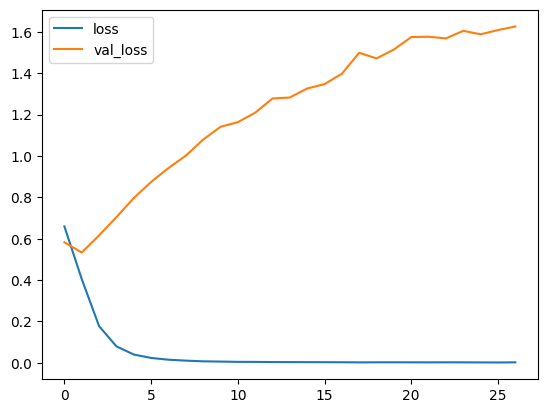

In [51]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot();

In [52]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [54]:
print(confusion_matrix(y_test,predictions), classification_report(y_test,predictions))

<bound method TensorFlowTrainer.evaluate of <Sequential name=sequential_4, built=True>>
[[1047  453]
 [ 501  999]]               precision    recall  f1-score   support

           0       0.68      0.70      0.69      1500
           1       0.69      0.67      0.68      1500

    accuracy                           0.68      3000
   macro avg       0.68      0.68      0.68      3000
weighted avg       0.68      0.68      0.68      3000



## deploiement